# convert data to zarr format

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt

import crocosi.postp as pp

In [2]:
from dask.distributed import Client, LocalCluster
#
cluster = LocalCluster()
#
#from dask_jobqueue import PBSCluster
#cluster = PBSCluster()
#w = cluster.scale(jobs=2)
#
client = Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:40098 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 8 Cores: 56 Memory: 107.37 GB


---

## load data

In [4]:
#root_path = '/home/c11-data/Test_aponte/jetn/'
root_path = '/home/datawork-lops-osi/equinox/jetn/tmp/'
run = 'jet_cfg1_wp6_4km_0a1000j'

In [4]:
r = pp.Run(root_path+run, outputs='all', read_zarr=False, verbose=True)

Analysing directory /home/datawork-lops-osi/equinox/jetn/tmp/jet_cfg1_wp6_4km_0a1000j
Found 2 segments
Found 10 his files
Found 2 ave files
Found 2 grid files
Found 4 surf files
Detected time step of 300.0 s
Detected theta_s = 5.0
Detected theta_b = 0.0
Detected Hc = 100.0 m
Detected rho0 = 1000.0 kg/m^3
Detected H = 4000.0 m
Found 9 columns in output.mpi:
['STEP', 'time[DAYS]', 'KINETIC_ENRG', 'POTEN_ENRG', 'TOTAL_ENRG', 'NET_VOLUME', 'trd', 'ENSTROPHY', 'BTKIN_ENRG']
Opening datasets:  ['his', 'ave', 'grid', 'surf']
Grid size: (L ,M, N) = (258, 722, 50)


---

## store to zarr format

In [5]:
r.store_zarr(mode='w')

his stored in /home/datawork-lops-osi/equinox/jetn/tmp/jet_cfg1_wp6_4km_0a1000j/zarr/his.zarr
ave stored in /home/datawork-lops-osi/equinox/jetn/tmp/jet_cfg1_wp6_4km_0a1000j/zarr/ave.zarr
grid stored in /home/datawork-lops-osi/equinox/jetn/tmp/jet_cfg1_wp6_4km_0a1000j/zarr/grid.zarr
surf stored in /home/datawork-lops-osi/equinox/jetn/tmp/jet_cfg1_wp6_4km_0a1000j/zarr/surf.zarr


---

## delete netcdf files

In [10]:
r.delete_nc()

/home/datawork-lops-osi/equinox/jetn/tmp/jet_cfg1_wp6_4km_0a1000j/t1/ave_00010101-00010410.nc deleted
/home/datawork-lops-osi/equinox/jetn/tmp/jet_cfg1_wp6_4km_0a1000j/t2/ave_00010101-00010410.nc deleted
/home/datawork-lops-osi/equinox/jetn/tmp/jet_cfg1_wp6_4km_0a1000j/t1/surf_00010101-00010219.nc deleted
/home/datawork-lops-osi/equinox/jetn/tmp/jet_cfg1_wp6_4km_0a1000j/t1/surf_00010220-00010410.nc deleted
/home/datawork-lops-osi/equinox/jetn/tmp/jet_cfg1_wp6_4km_0a1000j/t2/surf_00010101-00010219.nc deleted
/home/datawork-lops-osi/equinox/jetn/tmp/jet_cfg1_wp6_4km_0a1000j/t2/surf_00010220-00010410.nc deleted
/home/datawork-lops-osi/equinox/jetn/tmp/jet_cfg1_wp6_4km_0a1000j/t1/grid.nc deleted
/home/datawork-lops-osi/equinox/jetn/tmp/jet_cfg1_wp6_4km_0a1000j/t2/grid.nc deleted
/home/datawork-lops-osi/equinox/jetn/tmp/jet_cfg1_wp6_4km_0a1000j/t1/his_00010101-00010120.nc deleted
/home/datawork-lops-osi/equinox/jetn/tmp/jet_cfg1_wp6_4km_0a1000j/t1/his_00010121-00010209.nc deleted
/home/data

---
## reload fields and make a plot

In [11]:
r_zarr = pp.Run(root_path+run, outputs='all', verbose=True)

Analysing directory /home/datawork-lops-osi/equinox/jetn/tmp/jet_cfg1_wp6_4km_0a1000j
Found 2 segments
Found 0 his files
Detected time step of 300.0 s
Detected theta_s = 5.0
Detected theta_b = 0.0
Detected Hc = 100.0 m
Detected rho0 = 1000.0 kg/m^3
Detected H = 4000.0 m
Found 9 columns in output.mpi:
['STEP', 'time[DAYS]', 'KINETIC_ENRG', 'POTEN_ENRG', 'TOTAL_ENRG', 'NET_VOLUME', 'trd', 'ENSTROPHY', 'BTKIN_ENRG']
Opening datasets:  ['his']
Grid size: (L ,M, N) = (258, 722, 50)


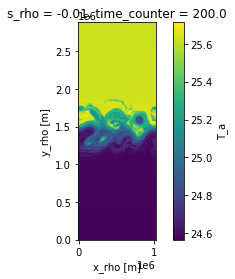

In [16]:
ax = plt.subplot()
r_zarr['his'].T_a.isel(time=-1,s_rho=-1).plot(ax=ax)
ax.set_aspect('equal','box')

---

In [ ]:
cluster.close()